In [42]:
import pandas as pd
import numpy as np
# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 100)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 12

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.neighbors.nearest_centroid import NearestCentroid

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix

import pandas.core.algorithms as algos

In [507]:
df = pd.read_csv('RatingData/cs-training.csv').drop('Unnamed: 0', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [104]:
%run woe_iv.py

In [508]:
final_iv
# IV

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,WOE,IV
0,RevolvingUtilizationOfUnsecuredLines,0.000000,0.156417,50000,1061.0,0.021336,48939.0,0.488067,-3.130075,5.505724
1,RevolvingUtilizationOfUnsecuredLines,0.156434,1.000000,55308,5482.0,0.110237,49826.0,0.496913,-1.505779,5.505724
2,RevolvingUtilizationOfUnsecuredLines,1.000000,50708.000000,44692,43186.0,0.868427,1506.0,0.015019,4.057347,5.505724
3,age,0.000000,1.000000,42288,42287.0,0.850349,1.0,0.000010,11.353523,11.375168
4,age,21.000000,24.000000,695,99.0,0.001991,596.0,0.005944,-1.093833,11.375168
5,age,25.000000,40.000000,22390,2285.0,0.045949,20105.0,0.200507,-1.473314,11.375168
6,age,41.000000,48.000000,21533,1815.0,0.036498,19718.0,0.196647,-1.684158,11.375168
7,age,49.000000,56.000000,22815,1646.0,0.033099,21169.0,0.211118,-1.852901,11.375168
8,age,57.000000,64.000000,20533,980.0,0.019707,19553.0,0.195002,-2.292043,11.375168
9,age,65.000000,109.000000,19746,617.0,0.012407,19129.0,0.190773,-2.732804,11.375168


In [486]:
name = np.unique(list(final_iv['VAR_NAME']))

for x in range(len(name)):
        
    factor = name[x]
    woe_name = factor+'_woe'
        
    select = final_iv['VAR_NAME'] == factor
    min_values = list(final_iv['MIN_VALUE'][select])
    min_values.extend([9999999999999])
    min_values.sort()
    min_values[0] = -9999999999999
    woe = list(final_iv['WOE'][select])
    df[woe_name] = pd.cut(df[factor], min_values, labels=woe).astype('float32')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
SeriousDlqin2yrs                            150000 non-null int64
RevolvingUtilizationOfUnsecuredLines        150000 non-null float64
age                                         150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse        150000 non-null int64
DebtRatio                                   150000 non-null float64
MonthlyIncome                               120269 non-null float64
NumberOfOpenCreditLinesAndLoans             150000 non-null int64
NumberOfTimes90DaysLate                     150000 non-null int64
NumberRealEstateLoansOrLines                150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse        150000 non-null int64
NumberOfDependents                          146076 non-null float64
DebtRatio_woe                               150000 non-null float32
MonthlyIncome_woe                           120269 non-null float32
NumberOfDependents_

C:\Users\Anders\Anaconda3\lib\site-packages\pandas\core\reshape\tile.py:130: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins) < 0).any():


In [625]:
X = df.drop(['SeriousDlqin2yrs'], axis = 1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(X_train.shape,  X_test.shape)
# data = df_num_mod.values
# col = df_num_mod.columns
# ind = df_num_mod.indexprint(y_train.shape, y_test.shape)

# Skapar df med numeriska värden
X_train_num = X_train.select_dtypes(exclude=['object'])
X_test_num = X_test.select_dtypes(exclude=['object'])


(105000, 10) (45000, 10)


In [613]:
X_train_num = X_train.select_dtypes(exclude=['object'])
q_lower = X_train_num.quantile(0.03)

X_train_num.shape

(30000, 10)

In [614]:
# Skapar df med icke numeriska värden
X_train_obj = X_train.select_dtypes(include=['object'])
X_test_obj = X_test.select_dtypes(include=['object'])

# Skapar df med numeriska värden
X_train_num = X_train.select_dtypes(exclude=['object'])
X_test_num = X_test.select_dtypes(exclude=['object'])

# Sparar col och index för att kunna skapa df
col_train = X_train_num.columns
ind_train = X_train_num.index
col_test = X_test_num.columns
ind_test = X_test_num.index

# Tar ut extremvärden från X_train
q_lower = X_train_num.quantile(0.03)
q_upper = X_train_num.quantile(0.97)

# Ersätter extremvärden i X_train   
X_train_q = (X_train_num < q_lower)
X_train_num = X_train_num.mask(X_train_q, q_lower, axis=1)
X_train_q = (X_train_num > q_upper)
X_train_num = X_train_num.mask(X_train_q, q_upper, axis=1)

# Ersätter extremvärden i X_test   
X_test_q = (X_test_num < q_lower)
X_test_num = X_test_num.mask(X_test_q, q_lower, axis=1)
X_test_q = (X_test_num > q_upper)
X_test_num = X_test_num.mask(X_test_q, q_upper, axis=1)

# Skapar arrayer från df
X_train_num = X_train_num.values
X_test_num = X_test_num.values

# Imputerar missingvärden med medianvärden
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(X_train_num)
X_train_imp = imp.transform(X_train_num)
X_test_imp = imp.transform(X_test_num)

# Transformerar till ett värde mellan 0 och 1 
scaler = MinMaxScaler()
scaler.fit(X_train_imp)

X_train_f = scaler.transform(X_train_imp)
X_test_f = scaler.transform(X_test_imp)

# Skapar df
df_train_num = pd.DataFrame(X_train_f, columns=col_train, index = ind_train).sort_index()
df_test_num = pd.DataFrame(X_test_f, columns=col_test, index = ind_test).sort_index()

df_train = pd.concat([X_train_obj, df_train_num], axis=1)
df_test = pd.concat([X_test_obj, df_test_num], axis=1)

In [490]:
X_train_f.shape

(105000, 20)

In [615]:
def fit_and_evaluate(model, name):
           
    model.fit(X_train_f, y_train)
    y_train_pos = (y_train == 1)    
    y_train_pred = cross_val_predict(model, X_train_f, y_train_pos, cv=3)
    ps = precision_score(y_train_pos, y_train_pred)
    rs = recall_score(y_train_pos, y_train_pred)
    f1 = f1_score(y_train_pos, y_train_pred)
    print(name, 'Precicion:=%0.4f' % ps, ', Detects:=%0.4f' % rs, ', F1=%0.4f:' % f1)   

In [596]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
model = NearestCentroid()
model = LogisticRegression()
model.fit(X_train_f, y_train)
y_train_pos = (y_train == 1)
y_train_pred = cross_val_predict(model, X_train_f, y_train_pos, cv=3, method='predict')

# pd.DataFrame(y_train_pred)

# ps = precision_score(y_train_pos, y_train_pred)
# rs = recall_score(y_train_pos, y_train_pred)
# f1 = f1_score(y_train_pos, y_train_pred)


In [617]:
LOGmodelGD = SGDClassifier(loss='log', penalty='l2', random_state=101, shuffle=True, max_iter=1000, tol=0.001)
fit_and_evaluate(LOGmodelGD, 'LOGmodelGD:')

LOGmodelGD: Precicion:=0.5348 , Detects:=0.2692 , F1=0.3582:


In [618]:
Nearestmodel = NearestCentroid()
fit_and_evaluate(Nearestmodel, 'NearestCentroid:')

NearestCentroid: Precicion:=0.2504 , Detects:=0.6952 , F1=0.3682:


In [619]:
RFmodel = RandomForestClassifier(random_state=101)
fit_and_evaluate(RFmodel, 'RFmodel:')

RFmodel: Precicion:=0.4797 , Detects:=0.1728 , F1=0.2541:


In [620]:
LOGmodel = LogisticRegression()
fit_and_evaluate(LOGmodel, 'LOGmodel:')

LOGmodel: Precicion:=0.5817 , Detects:=0.2132 , F1=0.3121:


In [621]:
HmodelGD = SGDClassifier(loss='hinge', penalty='l2', random_state=101, shuffle=True, max_iter=1000, tol=0.001)
fit_and_evaluate(HmodelGD, 'HmodelGD:')

HmodelGD: Precicion:=0.0000 , Detects:=0.0000 , F1=0.0000:


C:\Users\Anders\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Anders\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [622]:
y_test_pos = (y_test == 1)
y_scores = cross_val_predict(LOGmodel, X_test_f, y_test_pos, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_test_pos, y_scores)

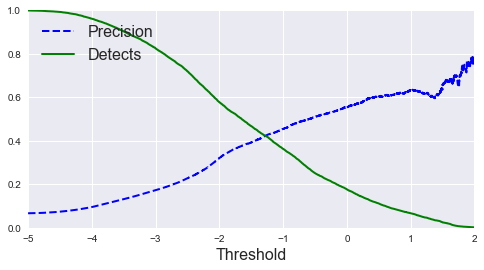

In [623]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Detects", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-5, 2])
# save_fig("precision_recall_vs_threshold_plot")
plt.show()

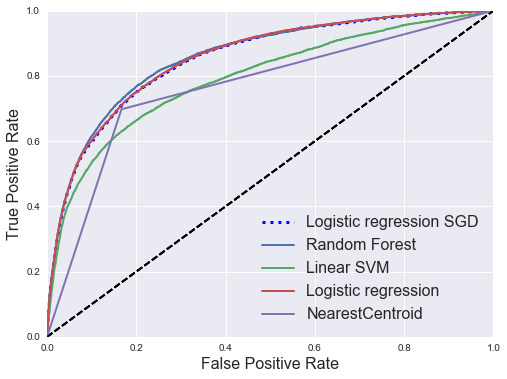

In [624]:
# ROC på test

#Log SGD
LOGmodelGD = SGDClassifier(loss='log', penalty='l2', random_state=101, shuffle=True, max_iter=1000, tol=0.001)
y_scores = cross_val_predict(LOGmodelGD, X_test_f, y_test_pos, cv=3, method="decision_function")    
fpr_log_gd, tpr_log_gd, thresholds = roc_curve(y_test_pos, y_scores)

#RF
RFmodel = RandomForestClassifier(random_state=101, n_estimators=100, max_features = 'auto', min_samples_split=100)
y_probas_forest = cross_val_predict(RFmodel, X_test_f, y_test_pos, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_pos, y_scores_forest)

#NearestCentroid
Nearestmodel = NearestCentroid(shrink_threshold=0.9)
y_probas_near = cross_val_predict(Nearestmodel, X_test_f, y_test_pos, cv=3, method="predict")
fpr_near, tpr_near, thresholds_near = roc_curve(y_test_pos, y_probas_near)

# linear SVM
HmodelGD = SGDClassifier(loss='hinge', penalty='l2', random_state=101, shuffle=True, max_iter=1000, tol=0.001)
y_scores = cross_val_predict(HmodelGD, X_test_f, y_test_pos, cv=3, method="decision_function")    
fpr_hinge, tpr_hinge, thresholds = roc_curve(y_test_pos, y_scores)

#Logistic regression 
LOGmodel = LogisticRegression()
y_scores = cross_val_predict(LOGmodel, X_test_f, y_test_pos, cv=3, method="decision_function") 
fpr_log, tpr_log, thresholds = roc_curve(y_test_pos, y_scores)


plt.figure(figsize=(8, 6))
plt.plot(fpr_log_gd, tpr_log_gd, "b:", linewidth=3, label="Logistic regression SGD")
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve(fpr_hinge, tpr_hinge, "Linear SVM")
plot_roc_curve(fpr_log, tpr_log, "Logistic regression")
plot_roc_curve(fpr_near, tpr_near, "NearestCentroid")

plt.legend(loc="lower right", fontsize=16)
plt.show()


In [499]:
#Log 
LOGmodel = LogisticRegression()
y_scores = cross_val_predict(LOGmodel, X_test_f, y_test_pos, cv=3, method="decision_function") 

In [500]:
y_scores

array([-4.78360734, -4.48870203, -4.25523023, ..., -3.70213834,
       -3.91917364, -3.9122131 ])

In [501]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

NameError: name 'fpr' is not defined

In [141]:
roc_auc_score(y_test_pos, y_scores)

0.9843583986385844

In [ ]:
y_test_pred = LOGmodel.predict(X_test_f)
y_test_pred

In [ ]:
SVRmodel = SVR()

SVRmodel.fit(X_train_f, y_train)
score = cross_val_score(SVRmodel, X_train_f, y_train, scoring="neg_mean_squared_error", cv=3)
mse = np.sqrt(-score).mean()
minmse = np.sqrt(-score).min()

print('MSE: = %0.4f' % mse,', Min MSE: = %0.4f' % minmse)
LinearSVR

In [ ]:
y_test_pred = SVRmodel.predict(X_test_f)
y_test_pred

In [547]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 50, 100], 'max_features': [8, 16, 32]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

grid_search = GridSearchCV(RFmodel, param_grid, cv=3,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_f, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [548]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [549]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score" ], cvres["params"]):
    print("%8.3f," % np.sqrt(-mean_score), params)

In [ ]:
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)


In [ ]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(df_train.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

In [ ]:
# model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
#                                   min_samples_leaf=6, min_samples_split=6, 
#                                   n_estimators=800, random_state=101)


model = SGDClassifier(random_state=101, shuffle=True, max_iter=1000, tol=0.001)
model.fit(X_train_f, y_train)

In [ ]:

y_test_pred = sgd_clf.predict(X_test_f)
f1_score(y_test, y_test_pred)

In [ ]:
y_train_pred = sgd_clf.predict(X_train_f)
f1_score(y_train, y_train_pred)

In [ ]:
# Hantering av extremvärden
# Beräknar percentiler på modelldata och ersätter värden utanför dessa på modell- och testdata

def extreme(df_mod, df_out, lower_q, upper_q, numdroplist):
    
# Plockar ut alla numeriska kolumner from df_mod
    df_num_mod = df_mod.select_dtypes(include=[np.number]).drop(numdroplist, axis = 1)
    
    df_num_out = df_out.select_dtypes(include=[np.number]).drop(numdroplist, axis = 1)
    df_char_out = df_out.select_dtypes(include=[np.character])
    df_obj_out = df_out.select_dtypes(include=[np.object])
    df_drop_out = df_out[numdroplist]
    
# Plockar ut kvartiler från df_mod
    q_lower = df_num_mod.quantile(lower_q)
    q_upper = df_num_mod.quantile(upper_q)

# Ersätter extremvärden i df_out    
    outliers_low = (df_num_out < q_lower)
    df_num_out.mask(outliers_low, q_lower, axis=1)
    outliers_high = (df_num_out > q_upper)
    num = df_num_out.mask(outliers_high, q_upper, axis=1)
    
    out = pd.concat([df_char_out, df_obj_out, df_drop_out, num], axis=1)
    
    return out

In [ ]:
koll = df.copy()
kk = extreme(df, koll, 0.05, 0.95, ['rating'])


In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    

In [ ]:
missing_values_table(df)

In [ ]:
# Get the columns with > 20% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 20].index)
print('We will remove %d columns.' % len(missing_columns))

In [ ]:
df = df.drop(list(missing_columns), axis = 1)
# df.info()

In [ ]:
figsize(4, 4)
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['rating'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Rating');
plt.ylabel('N'); 



In [ ]:
plt.rcParams['font.size'] = 5
numeric_subset = df.select_dtypes(include=[np.number])
numeric_subset.drop('qf_ownr_cat', axis = 1)
numeric_subset.hist(bins=5, figsize = (10,12))
plt.show()

In [ ]:
numeric_subset = df.select_dtypes(include=[np.number])
categorical_subset = df[['pop', 'land']]
categorical_subset = pd.get_dummies(categorical_subset)
df = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [ ]:
# Find all correlations and sort 
correlations_data = df.corr()['rating'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['rating']
#     x = x.drop(columns = ['score'])
    x = x.drop(['rating'], axis = 1)

    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(drops, axis = 1)
#     x = x.drop(['Weather Normalized Site EUI (kBtu/ft²)', 
#                 'Water Use (All Water Sources) (kgal)',
#                 'log_Water Use (All Water Sources) (kgal)',
#                 'Largest Property Use Type - Gross Floor Area (ft²)'], axis = 1)
    
    # Add the score back in to the data
    x['rating'] = y
               
    return x

In [ ]:
features = df.copy()
features = remove_collinear_features(features, 0.65)

In [ ]:
# Remove any columns with all na values
features = features.dropna(axis=1, how = 'all')


In [ ]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['rating'].isnull()]
score = features[features['rating'].notnull()]

print(no_score.shape)
print(score.shape)

In [ ]:
# Separate out the features and targets
features = score.drop(['rating'], axis=1)
targets = pd.DataFrame(score['rating'])

# Replace the inf and -inf with nan (required for later imputation)
# features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.2f" % mae(y_test, baseline_guess))

In [ ]:
no_score.to_csv('RatingData/no_score.csv', index = False)
X.to_csv('RatingData/training_features.csv', index = False)
X_test.to_csv('RatingData/testing_features.csv', index = False)
y.to_csv('RatingData/training_labels.csv', index = False)
y_test.to_csv('RatingData/testing_labels.csv', index = False)